In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
wine = pd.read_csv("C:/Users/Dell/Desktop/1788410-1767134-1729261-1613779-Red_wine__(1).csv")

In [3]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


In [4]:
wine.shape

(1599, 12)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [7]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [8]:
wine.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1598
density                 1599
pH                      1598
sulphates               1599
alcohol                 1599
quality                 1598
dtype: int64

In [9]:
wine[wine['total sulfur dioxide'].isna() | wine['pH'].isna() | wine['quality'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.50,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.80,10.5,5.0
123,8.0,0.71,0.00,2.6,0.080,11.0,34.0,0.9976,3.44,0.53,9.5,NaN
184,6.7,0.62,0.21,1.9,0.079,8.0,62.0,0.9970,NaN,0.58,9.3,6.0


In [10]:
wine.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


# Filling Missing Values

In [11]:
Rwine= wine.fillna({ 'total sulfur dioxide':32,
                   'pH':5,
                   'quality':3.52})
Rwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


In [12]:
Rwine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
Rwine.shape

(1599, 12)

In [14]:
Rwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


<Axes: xlabel='quality', ylabel='Density'>

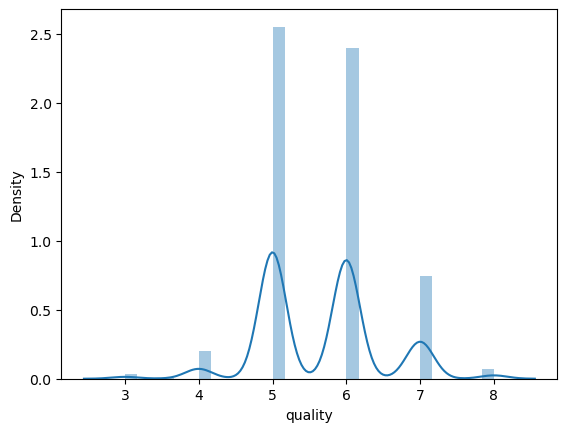

In [15]:
sns.distplot(Rwine['quality'])

<Axes: xlabel='quality', ylabel='alcohol'>

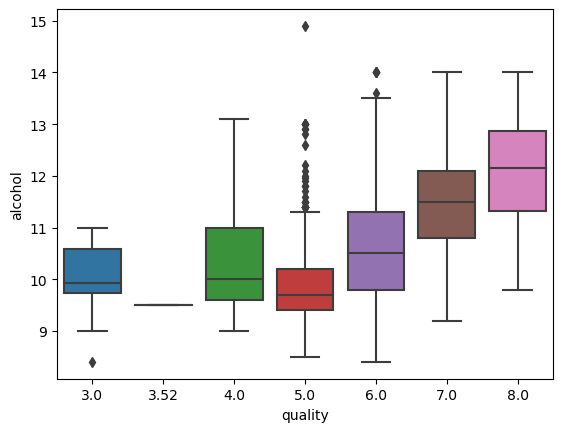

In [16]:
sns.boxplot(x='quality',y='alcohol',data=Rwine)

<Axes: ylabel='quality'>

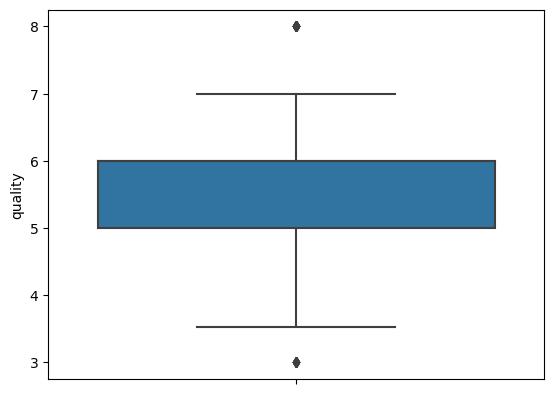

In [17]:
sns.boxplot(y='quality',data=Rwine)

In [18]:
Rwine['alcohol'].mean()

10.422983114446529

In [19]:
Redwine=Rwine[Rwine['quality']<7]

In [20]:
Redwine=Rwine[Rwine['quality']>3.5]

<Axes: ylabel='quality'>

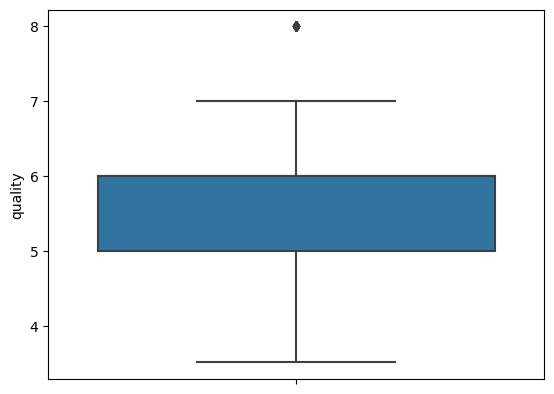

In [21]:
sns.boxplot(y='quality',data=Redwine)

In [22]:
Redwine['alcohol'].mean()

10.425928256765262

In [23]:
Redwine.shape

(1589, 12)

<Axes: >

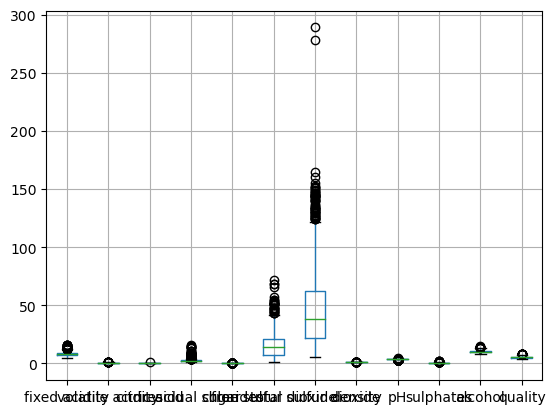

In [24]:
Redwine.boxplot()

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

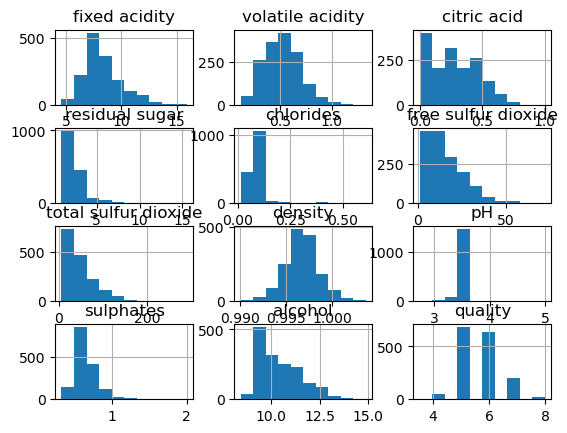

In [25]:
Redwine.hist()

In [26]:
Redwine['quality'].value_counts()

5.00    680
6.00    638
7.00    199
4.00     53
8.00     18
3.52      1
Name: quality, dtype: int64

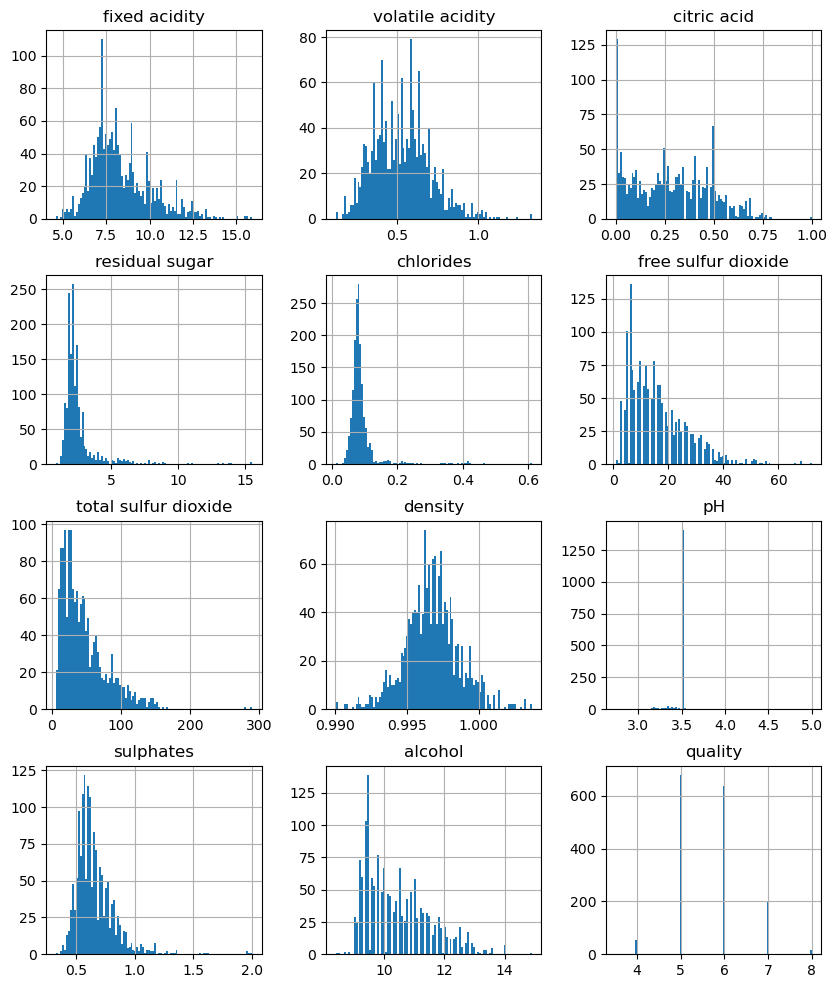

In [27]:
Redwine.hist(bins=100, figsize=(10,12))
plt.show()

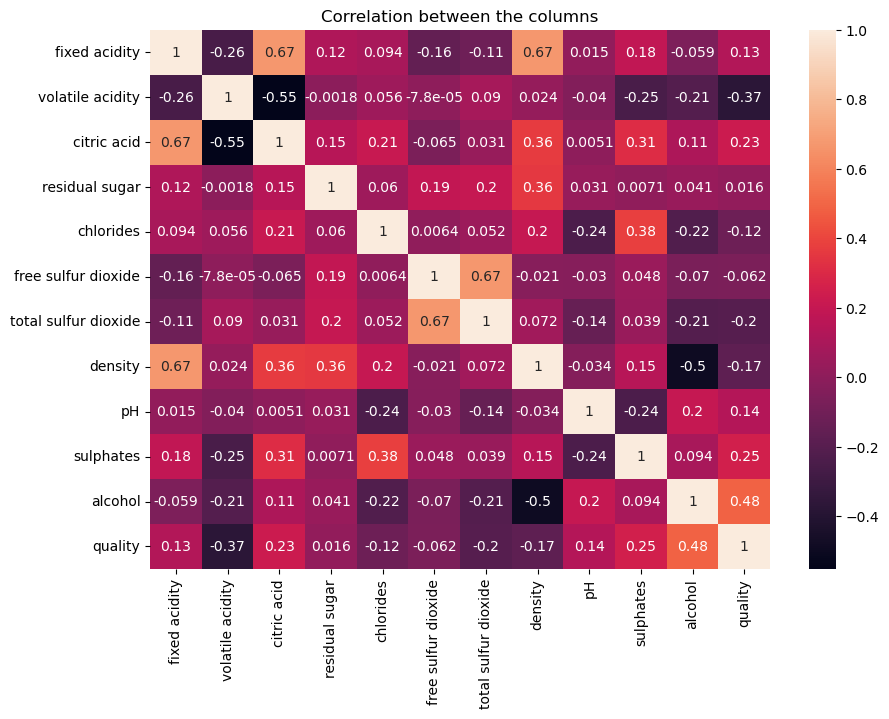

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(Redwine.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [29]:
Redwine.corr()['quality'].sort_values()

volatile acidity       -0.370720
total sulfur dioxide   -0.204192
density                -0.173816
chlorides              -0.118057
free sulfur dioxide    -0.061871
residual sugar          0.015628
fixed acidity           0.129251
pH                      0.136317
citric acid             0.225873
sulphates               0.250165
alcohol                 0.484754
quality                 1.000000
Name: quality, dtype: float64

<Axes: xlabel='quality', ylabel='alcohol'>

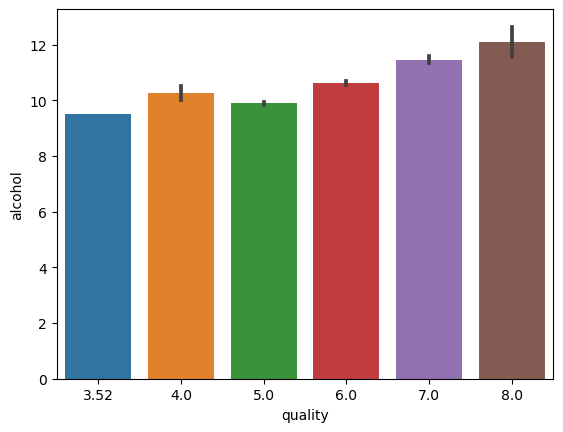

In [30]:
sns.barplot(x='quality', y='alcohol',data=Redwine)

In [31]:
Redwine['quality'] = Redwine.quality.apply(lambda x:1 if x>=7 else 0)

In [32]:
Redwine['quality'].value_counts()

0    1372
1     217
Name: quality, dtype: int64

In [33]:
x= Redwine.drop('quality',axis=1)
y= Redwine['quality']

In [34]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.3, random_state=42)

In [35]:
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (1112, 11)
y_train (1112,)
x_test (477, 11)
y_test (477,)


# Logistic Regression Model

In [36]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred =logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("test accuracy is: {:.2f}%".format(logreg_acc*100))

test accuracy is: 89.52%


In [37]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       431
           1       0.44      0.30      0.36        46

    accuracy                           0.90       477
   macro avg       0.68      0.63      0.65       477
weighted avg       0.88      0.90      0.89       477



TN: 413
FN: 32
TP: 14
FP: 18


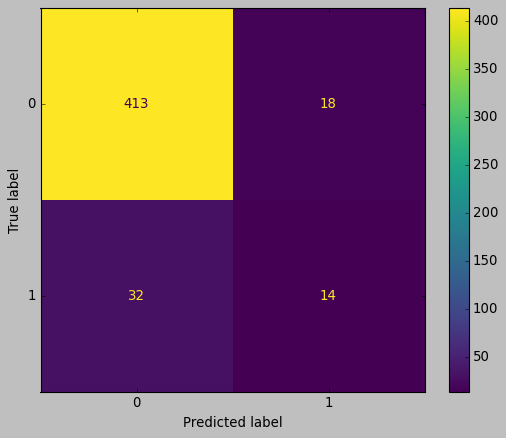

In [38]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
print("TN:", cm[0][0])
print("FN:", cm[1][0])
print("TP:", cm[1][1])
print("FP:", cm[0][1])

# Decision Tree

In [39]:
dtree= DecisionTreeClassifier()
dtree.fit(x_train, y_train)
dtree_pred = dtree.predict(x_test)
dtree_acc =accuracy_score(dtree_pred, y_test)
print("Test accuracy:{:.2f}%".format(dtree_acc*100))

Test accuracy:87.84%


In [40]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       431
           1       0.42      0.72      0.53        46

    accuracy                           0.88       477
   macro avg       0.70      0.81      0.73       477
weighted avg       0.91      0.88      0.89       477



TN: 386
FN: 13
TP: 33
FP: 45


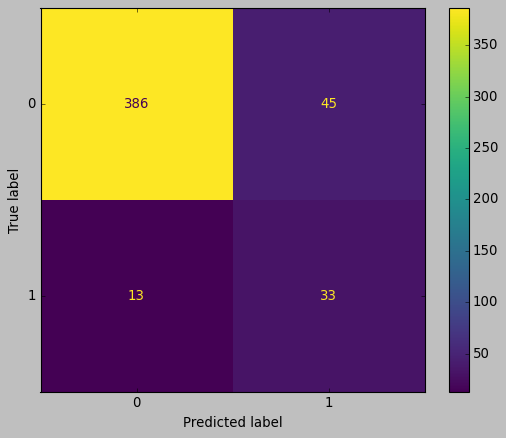

In [41]:
style.use('classic')
cm = confusion_matrix(y_test, dtree_pred, labels=dtree.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
disp.plot()
print("TN:", cm[0][0])
print("FN:", cm[1][0])
print("TP:", cm[1][1])
print("FP:", cm[0][1])

# Random Forest

In [42]:
rforest = RandomForestClassifier()
rforest.fit(x_train, y_train)
rforest_pred=rforest.predict(x_test)
rforest_acc=accuracy_score(rforest_pred, y_test)
print("Test accuracy:{:.2f}%".format(rforest_acc*100))


Test accuracy:90.99%


In [43]:
print(classification_report(y_test, rforest_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       431
           1       0.53      0.59      0.56        46

    accuracy                           0.91       477
   macro avg       0.74      0.77      0.75       477
weighted avg       0.91      0.91      0.91       477



TN: 407
FN: 19
TP: 27
FP: 24


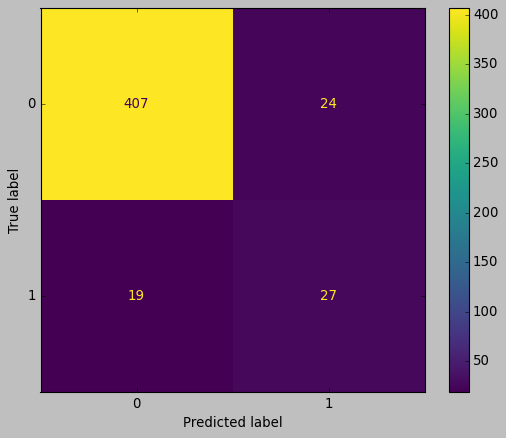

In [44]:
style.use('classic')
cm = confusion_matrix(y_test, rforest_pred, labels=rforest.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rforest.classes_)
disp.plot()
print("TN:", cm[0][0])
print("FN:", cm[1][0])
print("TP:", cm[1][1])
print("FP:", cm[0][1])